In [1]:
import numpy as np
import matplotlib.pyplot as plt                 #For plotting
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf
figlist = []
#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                   
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'lines.linewidth': 2.0}
pylab.rcParams.update(params)
#********************************************************************************************************
from plotting import plotTF

In [2]:
# Cavity transmission power coupling factors W/V
# At 10dB gain setting, from
# /home/controls/Git/cit_ctnlab/modbus/ALLSlowControls/LaserSlowControlsAndMonitors.db
SCoupFac = 1.257e-3
NCoupFac = 0.6257e-3
SPow = 2.8e-3 # W
NPow = 3.1e-3 # W

In [3]:
ff = np.loadtxt('ISS_OFF_25-02-2020_162232.txt')[:, 0]
NOFF = np.loadtxt('ISS_OFF_25-02-2020_162232.txt')[:, 1]*NCoupFac
SOFF = np.loadtxt('ISS_OFF_25-02-2020_162232.txt')[:, 2]*SCoupFac
NG5000 = np.loadtxt('ISS_ON_NG_5000_SG_10000_25-02-2020_161520.txt')[:, 1]*NCoupFac
SG10000 = np.loadtxt('ISS_ON_NG_5000_SG_10000_25-02-2020_161520.txt')[:, 2]*SCoupFac
NG2000 = np.loadtxt('ISS_ON_NG_2000_SG_5000_25-02-2020_161659.txt')[:, 1]*NCoupFac
SG5000 = np.loadtxt('ISS_ON_NG_2000_SG_5000_25-02-2020_161659.txt')[:, 2]*SCoupFac
NG1000 = np.loadtxt('ISS_ON_NG_1000_SG_2000_25-02-2020_161831.txt')[:, 1]*NCoupFac
SG2000 = np.loadtxt('ISS_ON_NG_1000_SG_2000_25-02-2020_161831.txt')[:, 2]*SCoupFac
NG500 = np.loadtxt('ISS_ON_NG_500_SG_1000_25-02-2020_161954.txt')[:, 1]*NCoupFac
SG1000 = np.loadtxt('ISS_ON_NG_500_SG_1000_25-02-2020_161954.txt')[:, 2]*SCoupFac
NSR785 = np.loadtxt('MeasSetupNoise_25-02-2020_162457.txt')[:, 1]*NCoupFac
SSR785 = np.loadtxt('MeasSetupNoise_25-02-2020_162457.txt')[:, 2]*SCoupFac

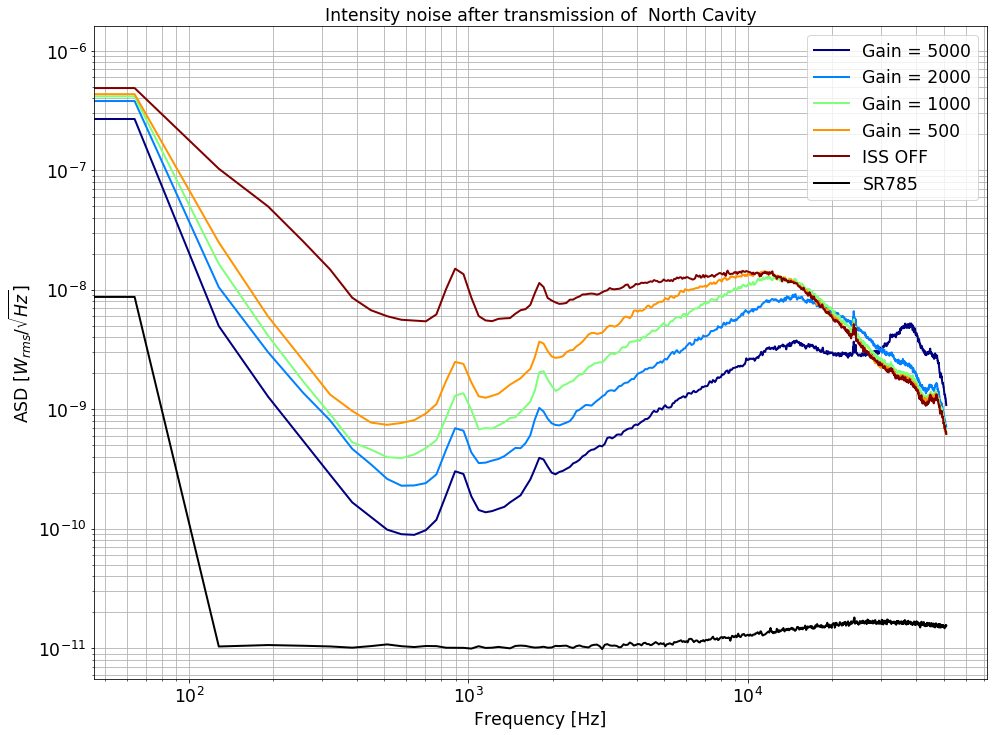

In [4]:
fig = plt.figure(figsize=[16, 12])
ax = fig.gca()
colors = plt.cm.jet(np.linspace(0,1,5))
ax.loglog(ff, NG5000, label='Gain = 5000', color = colors[0])
ax.loglog(ff, NG2000, label='Gain = 2000', color = colors[1])
ax.loglog(ff, NG1000, label='Gain = 1000', color = colors[2])
ax.loglog(ff, NG500, label='Gain = 500', color = colors[3])
ax.loglog(ff, NOFF, label='ISS OFF', color = colors[4])
ax.loglog(ff, NSR785, label='SR785', color = 'k')
ax.set_title('Intensity noise after transmission of  North Cavity')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('ASD [$W_{rms}/\sqrt{Hz}$]')
ax.grid('on', which='both')
ax.legend()
figlist = [fig]

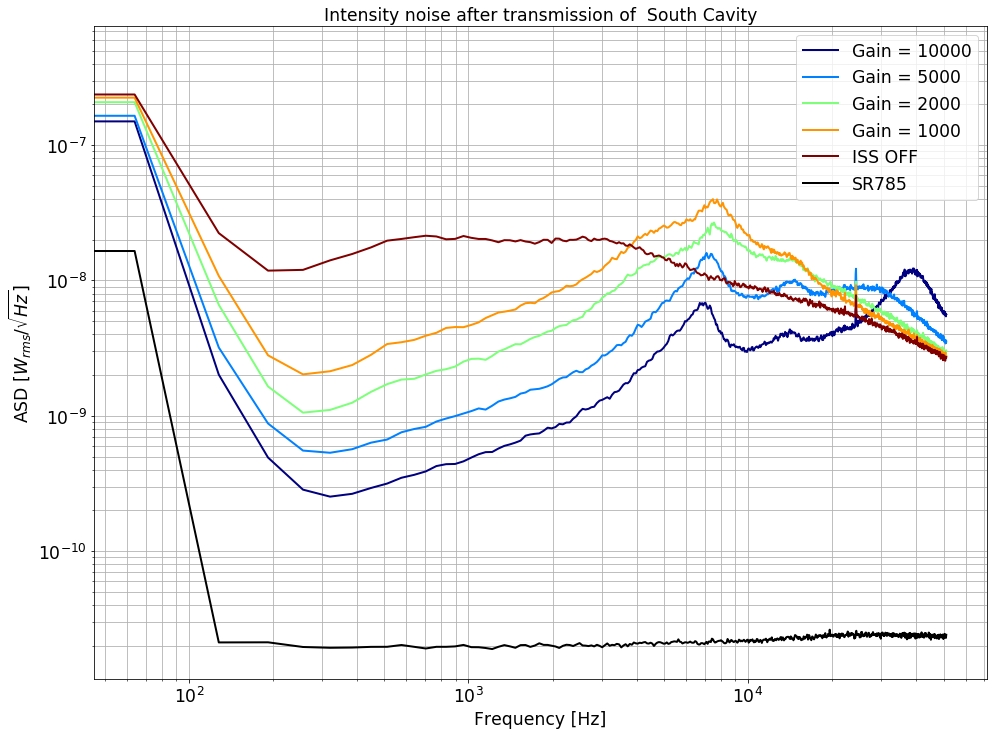

In [5]:
fig = plt.figure(figsize=[16, 12])
ax = fig.gca()
colors = plt.cm.jet(np.linspace(0,1,5))
ax.loglog(ff, SG10000, label='Gain = 10000', color = colors[0])
ax.loglog(ff, SG5000, label='Gain = 5000', color = colors[1])
ax.loglog(ff, SG2000, label='Gain = 2000', color = colors[2])
ax.loglog(ff, SG1000, label='Gain = 1000', color = colors[3])
ax.loglog(ff, SOFF, label='ISS OFF', color = colors[4])
ax.loglog(ff, SSR785, label='SR785', color = 'k')
ax.set_title('Intensity noise after transmission of  South Cavity')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('ASD [$W_{rms}/\sqrt{Hz}$]')
ax.grid('on', which='both')
ax.legend()
figlist += [fig]

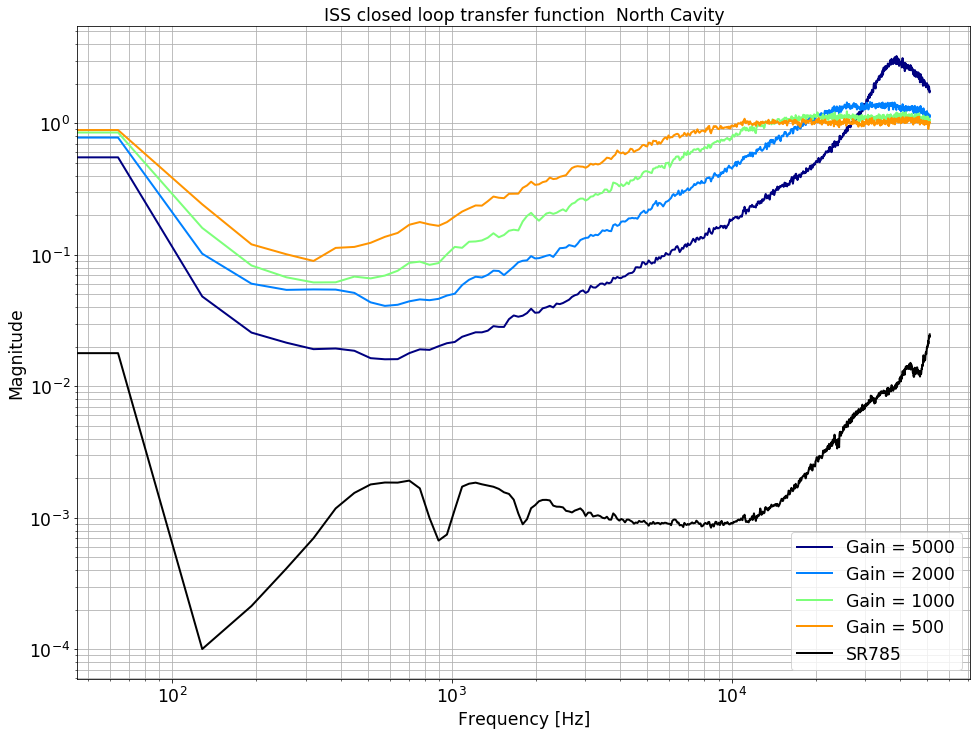

In [6]:
fig = plt.figure(figsize=[16, 12])
ax = fig.gca()
colors = plt.cm.jet(np.linspace(0,1,5))
ax.loglog(ff, NG5000/NOFF, label='Gain = 5000', color = colors[0])
ax.loglog(ff, NG2000/NOFF, label='Gain = 2000', color = colors[1])
ax.loglog(ff, NG1000/NOFF, label='Gain = 1000', color = colors[2])
ax.loglog(ff, NG500/NOFF, label='Gain = 500', color = colors[3])
ax.loglog(ff, NSR785/NOFF, label='SR785', color = 'k')
ax.set_title('ISS closed loop transfer function  North Cavity')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Magnitude')
ax.grid('on', which='both')
ax.legend()
figlist += [fig]

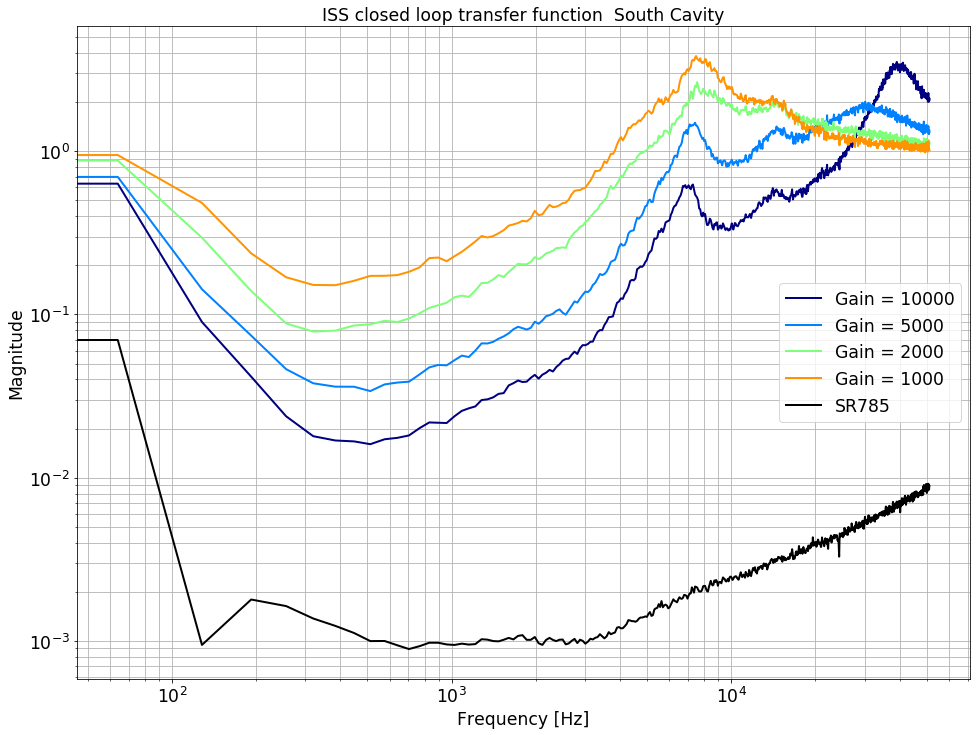

In [7]:
fig = plt.figure(figsize=[16, 12])
ax = fig.gca()
colors = plt.cm.jet(np.linspace(0,1,5))
ax.loglog(ff, SG10000/SOFF, label='Gain = 10000', color = colors[0])
ax.loglog(ff, SG5000/SOFF, label='Gain = 5000', color = colors[1])
ax.loglog(ff, SG2000/SOFF, label='Gain = 2000', color = colors[2])
ax.loglog(ff, SG1000/SOFF, label='Gain = 1000', color = colors[3])
ax.loglog(ff, SSR785/SOFF, label='SR785', color = 'k')
ax.set_title('ISS closed loop transfer function  South Cavity')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Magnitude')
ax.grid('on', which='both')
ax.legend()
figlist += [fig]

In [8]:
pp = PdfPages('ISS_Diff_Gains.pdf')
for fig in figlist:
    pp.savefig(fig,bbox_inches='tight')
pp.close()